# A Sentiment Analysis of Yelp Reviews


### 1. Import necessary packages:

In [25]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadirkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2a. Load the dataset with a sample of 10,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [26]:
yelp_data = pd.read_json('/Users/nadirkhan/Desktop/Spring Quarter/ML/Group Project/github-repo/yelp_dataset/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=10_000)
for chunk in yelp_data:
    yelp_sample_ten_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_ten_thou['length'] = yelp_sample_ten_thou['text'].apply(len)
yelp_sample_ten_thou['stars'] = yelp_sample_ten_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_ten_thou.shape)

print()
print("Column names:", yelp_sample_ten_thou.columns)

print()
print("Datatype of each column:")
print(yelp_sample_ten_thou.dtypes)

print()
print("A few dataset entries:")
print(yelp_sample_ten_thou.head())

print()
print("Dataset Summary:")
yelp_sample_ten_thou.describe(include='all')



Shape of the dataset: (10000, 10)

Column names: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'length'],
      dtype='object')

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
length                  int64
dtype: object

A few dataset entries:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJ

/var/folders/xr/qyw__xkj3hs3g1z9dg3hpts00000gn/T/ipykernel_67537/2821618750.py:29: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yelp_sample_ten_thou.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000
unique,10000,9472,3930,NaN,NaN,NaN,NaN,10000,9991,NaN
top,KU_O5udG6zpxOg-VcAEodg,n-lBS02-3yvlY5Q91mmwDA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,"If you decide to eat here, just be aware it is...",2017-04-19 18:49:27,NaN
freq,1,6,85,NaN,NaN,NaN,NaN,1,2,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 17:47:15,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-04 18:22:35,NaN
mean,NaN,NaN,NaN,3.854300,0.889100,0.246500,0.335500,NaN,NaN,549.039100
std,NaN,NaN,NaN,1.346719,2.092329,0.885221,1.051023,NaN,NaN,504.435838
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,26.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN,224.000000


### 2b. Load the dataset with a sample of 100,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [27]:
yelp_data = pd.read_json('/Users/nadirkhan/Desktop/Spring Quarter/ML/Group Project/github-repo/yelp_dataset/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=100_000)
for chunk in yelp_data:
    yelp_sample_hund_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_hund_thou['length'] = yelp_sample_hund_thou['text'].apply(len)
yelp_sample_hund_thou['stars'] = yelp_sample_hund_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_hund_thou.shape)

print()
print("Dataset Summary:")
yelp_sample_hund_thou.describe(include='all')



Shape of the dataset: (100000, 10)

Dataset Summary:


/var/folders/xr/qyw__xkj3hs3g1z9dg3hpts00000gn/T/ipykernel_67537/2712916468.py:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yelp_sample_hund_thou.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,100000,79345,9973,NaN,NaN,NaN,NaN,99964,99906,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,Service was a little slow to start but improve...,2017-01-15 18:04:45,NaN
freq,1,65,950,NaN,NaN,NaN,NaN,2,2,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 17:47:15,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-04 18:22:35,NaN
mean,NaN,NaN,NaN,3.842910,0.898980,0.257180,0.347030,NaN,NaN,548.438330
std,NaN,NaN,NaN,1.354729,2.205186,1.010212,1.066382,NaN,NaN,501.703274
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,3.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN,226.000000


### 2c. Load the dataset with a sample of 1,000,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [28]:
yelp_data = pd.read_json('/Users/nadirkhan/Desktop/Spring Quarter/ML/Group Project/github-repo/yelp_dataset/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=1_000_000)
for chunk in yelp_data:
    yelp_sample_mil = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_mil['length'] = yelp_sample_mil['text'].apply(len)
yelp_sample_mil['stars'] = yelp_sample_mil['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_mil.shape)

print()
print("Dataset Summary:")
yelp_sample_mil.describe(include='all')


Shape of the dataset: (1000000, 10)

Dataset Summary:


/var/folders/xr/qyw__xkj3hs3g1z9dg3hpts00000gn/T/ipykernel_67537/1596295242.py:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yelp_sample_mil.describe(include='all')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000.000000
unique,1000000,542003,27095,NaN,NaN,NaN,NaN,998357,997810,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,I have eaten at just about every decent Indian...,2015-05-02 02:13:32,NaN
freq,1,483,4661,NaN,NaN,NaN,NaN,5,3,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 17:47:15,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-19 19:47:59,NaN
mean,NaN,NaN,NaN,3.783959,1.106594,0.307812,0.457129,NaN,NaN,563.451724
std,NaN,NaN,NaN,1.440197,2.848906,1.428185,1.799114,NaN,NaN,520.728919
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN,228.000000


In [29]:
star_counts = yelp_sample_ten_thou['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_ten_thou = yelp_sample_ten_thou.groupby('stars').apply(lambda x: x[:min_count])
count_ten_thou = yelp_sample_equal_ten_thou['stars'].value_counts()

print()
print("Star count")
print(count_ten_thou)

star_counts = yelp_sample_hund_thou['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_hund_thou = yelp_sample_hund_thou.groupby('stars').apply(lambda x: x[:min_count])
count_hund_thou = yelp_sample_equal_hund_thou['stars'].value_counts()

print()
print("Star count")
print(count_hund_thou)

star_counts = yelp_sample_mil['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_mil = yelp_sample_mil.groupby('stars').apply(lambda x: x[:min_count])
count_mil = yelp_sample_equal_mil['stars'].value_counts()

print()
print("Star count")
print(count_mil)



Star count
1.0    763
2.0    763
3.0    763
4.0    763
5.0    763
Name: stars, dtype: int64

Star count
1.0    7988
2.0    7988
3.0    7988
4.0    7988
5.0    7988
Name: stars, dtype: int64

Star count
1.0    77912
2.0    77912
3.0    77912
4.0    77912
5.0    77912
Name: stars, dtype: int64


### 3. Plot histograms of review length frenquencies by the star rating:

Text(0.5, 1.0, 'Star Rating Frequency with a RAW Sample of One Million Reviews')

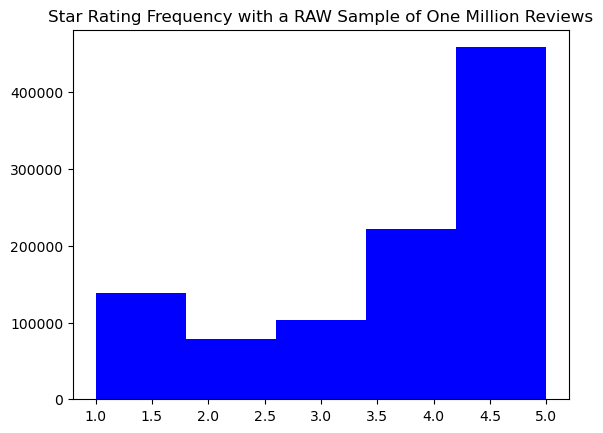

In [30]:
graph_star_freq_raw = plt.hist(yelp_sample_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a RAW Sample of One Million Reviews')

Text(0.5, 1.0, 'Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

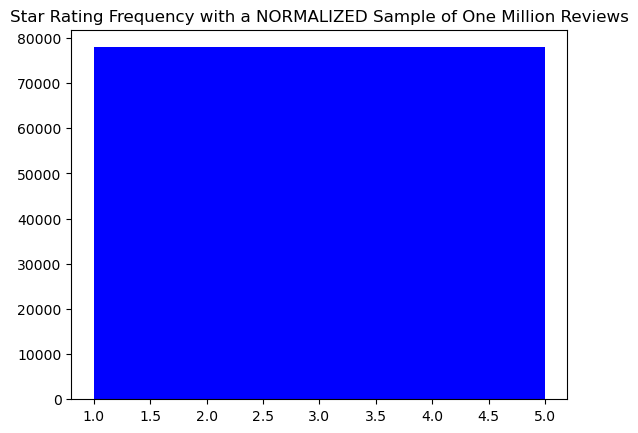

In [31]:
graph_star_freq_normal = plt.hist(yelp_sample_equal_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

We want to note here that our sample dataset is biased to more positive reviews than negative reviews. As a result, we should proceed with caution when classifying, training, and predicting with this dataset.

In [35]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_hund_thou_five = yelp_classify['text']
y_hund_thou_five = yelp_classify['stars']

print()
print("A few X entries")
print(x_hund_thou_five)

print()
print("A few Y entries")
print(y_hund_thou_five)


Shape of the dataset: (39940, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 39940, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 4.b.ii. Classify 100,000 standardized reviews into 1-star (negative) and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [36]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_two = data_classes['text']
y_hund_thou_two = data_classes['stars']

print()
print("A few X entries")
print(x_hund_thou_two)

print()
print("A few Y entries")
print(y_hund_thou_two)


Shape of the dataset: (15976, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 15976, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 4.b.iii. Classify 100,000 standardized reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [37]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_three = data_classes['text']
y_hund_thou_three = data_classes['stars']

print()
print("A few X entries")
print(x_hund_thou_three)

print()
print("A few Y entries")
print(y_hund_thou_three)


Shape of the dataset: (23964, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 23964, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 5. Clean the review text by removing stopwords and punctuation:

In [57]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Convert 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews into vectors:

In [45]:
vocab_hund_thou_five = CountVectorizer(analyzer=process_text).fit(x_hund_thou_five)
r1 = x_hund_thou_five[1]
vocab1 = vocab_hund_thou_five.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_five.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_five.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_five.get_feature_names_out()[20000])


Number of possible words: 76896

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 85)	1
  (0, 88)	1
  (0, 89)	419
  (0, 90)	493
  (0, 91)	23
  (0, 92)	7
  (0, 106)	1
  (0, 108)	1
  (0, 109)	1
  (0, 120)	1
  (0, 123)	1
  (0, 125)	2
  (0, 162)	1
  (0, 207)	1
  (0, 210)	1
  (0, 215)	1
  (0, 216)	3


### Convert 100,000 (1-star and 5-star) reviews into vectors:

In [46]:
vocab_hund_thou_two = CountVectorizer(analyzer=process_text).fit(x_hund_thou_two)
r1 = x_hund_thou_two[1]
vocab1 = vocab_hund_thou_two.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_two.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_two.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_two.get_feature_names_out()[20000])


Number of possible words: 45501

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 48)	1
  (0, 50)	1
  (0, 51)	419
  (0, 52)	493
  (0, 53)	23
  (0, 54)	7
  (0, 65)	1
  (0, 67)	1
  (0, 68)	1
  (0, 75)	1
  (0, 77)	1
  (0, 78)	2
  (0, 100)	1
  (0, 127)	1
  (0, 129)	1
  (0, 131)	1
  (0, 132)	3
  (0, 

### Convert 100,000 (1-star, 3-star, and 5-star) reviews into vectors:

In [47]:
vocab_hund_thou_three = CountVectorizer(analyzer=process_text).fit(x_hund_thou_three)
r1 = x_hund_thou_three[1]
vocab1 = vocab_hund_thou_three.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_three.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_three.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_three.get_feature_names_out()[20000])


Number of possible words: 57720

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 59)	1
  (0, 61)	1
  (0, 62)	419
  (0, 63)	493
  (0, 64)	23
  (0, 65)	7
  (0, 77)	1
  (0, 79)	1
  (0, 80)	1
  (0, 88)	1
  (0, 90)	1
  (0, 92)	2
  (0, 119)	1
  (0, 151)	1
  (0, 153)	1
  (0, 156)	1
  (0, 157)	3
  (0, 

###  Vectorize all 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [59]:
x_ten_thou_five = vocab_ten_thou_five.transform(x_ten_thou_five)
x_train_ten_thou_five, x_test_ten_thou_five, y_train_ten_thou_five, y_test_ten_thou_five = train_test_split(x_ten_thou_five, y_ten_thou_five, test_size=0.2, random_state=101)

### Vectorize all 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [68]:
x_hund_thou_five = vocab_hund_thou_five.transform(x_hund_thou_five)
x_train_hund_thou_five, x_test_hund_thou_five, y_train_hund_thou_five, y_test_hund_thou_five = train_test_split(x_hund_thou_five, y_hund_thou_five, test_size=0.2, random_state=101)

TypeError: 'in <string>' requires string as left operand, not csr_matrix

### Vectorize all 100,000 (1-star and 5-star) reviews and split processed dataset into training and testing sets:

In [61]:
x_hund_thou_two = vocab_hund_thou_two.transform(x_hund_thou_two)
x_train_hund_thou_two, x_test_hund_thou_two, y_train_hund_thou_two, y_test_hund_thou_two = train_test_split(x_hund_thou_two, y_hund_thou_two, test_size=0.2, random_state=101)

### Vectorize all 100,000 (1-star, 3-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [66]:
x_hund_thou_three = vocab_hund_thou_three.transform(x_hund_thou_three)
x_train_hund_thou_three, x_test_hund_thou_three, y_train_hund_thou_three, y_test_hund_thou_three = train_test_split(x_hund_thou_three, y_hund_thou_three, test_size=0.2, random_state=101)

### 10.b.ii. Modeling 100,000 (1-star and 5-star) reviews with the Neural Network:

In [63]:
from sklearn.neural_network import MLPClassifier
# def nnl_classifier(self, regularization_rate=0.01, learning_rate=0.001, layer_sizes=(100,), num_layers=1):
#     """
#     """
clf = MLPClassifier(
random_state=101,
max_iter=200,
alpha=0.01,
learning_rate_init=0.001,
hidden_layer_sizes=100
)

clf.fit(x_train_hund_thou_two, y_train_hund_thou_two)
clfpredict = clf.predict(x_test_hund_thou_two)
        
print()
print("Score:",round(accuracy_score(y_test_hund_thou_two, clfpredict) * 100, 2))

print()
print("Classification Report NNL:")
print(classification_report(y_test_hund_thou_two, clfpredict)) 


Score: 94.77

Classification Report NNL:
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95      1604
         5.0       0.95      0.95      0.95      1592

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196



### 8.b.iii. Modeling 100,000 (1-star, 3-star, and 5-star) reviews with Neural Network

In [67]:
from sklearn.neural_network import MLPClassifier
# def nnl_classifier(self, regularization_rate=0.01, learning_rate=0.001, layer_sizes=(100,), num_layers=1):
#     """
#     """
clf = MLPClassifier(
random_state=101,
max_iter=200,
alpha=0.01,
learning_rate_init=0.001,
hidden_layer_sizes=100
)

clf.fit(x_train_hund_thou_three, y_train_hund_thou_three)
clfpredict = clf.predict(x_test_hund_thou_three)
        
print()
print("Score:",round(accuracy_score(y_test_hund_thou_three, clfpredict) * 100, 2))

print()
print("Classification Report NNL:")
print(classification_report(y_test_hund_thou_t, clfpredict)) 


Score: 79.03

Classification Report NNL:
              precision    recall  f1-score   support

         1.0       0.83      0.81      0.82      1640
         3.0       0.73      0.72      0.72      1604
         5.0       0.81      0.84      0.83      1549

    accuracy                           0.79      4793
   macro avg       0.79      0.79      0.79      4793
weighted avg       0.79      0.79      0.79      4793



From the above models, we can compare the accuracy scores:
* Multinomial Naive Bayes: 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 47.05  </span>| <span style='background:lightgreen'> 90.52  </span>   | <span style='background:lightgoldenrodyellow'> 74.67 </span> |
| 100,000   | <span style='background:lightcoral'> 52.77 </span> | <span style='background:lightgreen'> **94.9** </span> | <span style='background:lightgoldenrodyellow'> 78.24 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 78.24 </span>     | <span style='background:lightgreen'> 93.54 </span>    | <span style='background:lightgoldenrodyellow'> 79.66 </span> |


* Random Forest Classifier:

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 41.81 </span> | <span style='background:lightgreen'> 91.18 </span>     | <span style='background:lightgoldenrodyellow'> 70.09 </span> |
| 100,000   | <span style='background:lightcoral'> 49.67 </span> | <span style='background:lightgreen'> 93.71 </span>     | <span style='background:lightgoldenrodyellow'> 76.84 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 77.93 </span>     | <span style='background:lightgreen'> **94.64** </span> | <span style='background:lightgoldenrodyellow'> 79.98 </span> |

* Decision Tree Classifier:

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 30.14 </span> | <span style='background:lightgoldenrodyellow'> 77.45 </span>         | <span style='background:lightcoral'> 52.62 </span> |
| 100,000   | <span style='background:lightcoral'> 37.56 </span> | <span style='background:lightgreen'> 85.67 </span>     | <span style='background:lightgoldenrodyellow'> 63.78 </span>     |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 63.45 </span>     | <span style='background:lightgreen'> **88.18** </span> | <span style='background:lightgoldenrodyellow'> 67.77 </span>     |

Since the Multinomial Naive Bayes makes the most accurate prediction, let's use it to predict a sample positive, a sample neutral, and a sample negative review:

### 11. Classify a positive review:

In [ ]:
# pos_rev = yelp_sample_equal_hund_thou['text'][5][1]
# pos_rev_trans = vocab_hund_thou_two.transform([pos_rev])

# print()
# print("Sample positive review:")
# print(pos_rev)

# print()
# print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][5][1])
# print("Predicted Rating:", mnb_hund_2.predict(pos_rev_trans)[0])


### 12. Classify a negative review:

In [ ]:
# neg_rev = yelp_sample_equal_hund_thou['text'][1][5]
# neg_rev_trans = vocab_hund_thou_two.transform([neg_rev])

# print()
# print("Sample negative review:")
# print(neg_rev)

# print()
# print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][1][5])
# print("Predicted Rating:", mnb_hund_2.predict(neg_rev_trans)[0])
